# Figure 5BC

Notebook to generate figure 5 BC

- B) comparison of HOT with LDEO-HPD output.  
- C)comparison between BATS and LDEO-HPD output


In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'png'
%config InlineBackend.print_figure_kwargs = {'dpi':300, 'bbox_inches': 'tight'}
import numpy as np
import pandas as pd
import xarray as xr
import xarray.ufuncs as xu
import cmocean as cm
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.ticker import AutoMinorLocator
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import os
import glob

### Makes world maps
from plotting_tools.spatial_map import SpatialMap
from plotting_tools.time_series_diagram import TimeSeriesPlot
from plotting_tools.utils import xr_add_cyclic_point

In [2]:
#dir_raw = '/local/data/artemis/workspace/gloege/SOCAT-LE/data/raw'
#dir_clean = '/local/data/artemis/workspace/gloege/SOCAT-LE/data/clean'
dir_figs = '/home/gloege/projects/ldeo_hpd/reports/figures'

# Load data

## Load HPD

In [4]:
%%time
ds_hpd = xr.open_dataset('/local/data/artemis/workspace/gloege/ldeo-hpd/LDEO-HPD_v20210425_1x1_198201-201812.nc')
ds_hpd = ds_hpd.mean('model')

/home/gloege/.conda/envs/tensorflow/lib/python3.7/site-packages/xarray/core/nanops.py:140: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


CPU times: user 3.28 s, sys: 5.88 s, total: 9.17 s
Wall time: 9.61 s


## Load time series

In [3]:
# locations
BATS={'lat':31.83,
      'lon':360-(64.17)}

HOT={'lat':22.75,
      'lon':360-158}

# load data
dir_data = '/local/data/artemis/workspace/gloege'

# BATS
ds_bats = xr.open_dataset(f'/local/data/artemis/workspace/gloege/data/BATS/BATS.nc')
#ds_bats = xr.open_dataset('/data/artemis/observations/BATS/2021_data/bats_spco2_199110-201906.nc')


# HOT
#ds_hot = xr.open_dataset(f'{dir_data}/data/HOT/HOT.nc')
#ds_hot = ds_hot.where(ds_hot['spco2']>0)

df_hot = pd.read_csv('https://hahana.soest.hawaii.edu/hot/products/HOT_surface_CO2.txt',delim_whitespace=True, skiprows=7)
mask=(df_hot['pCO2calc_insitu']>0)
df_hot = df_hot[mask]
df_hot = df_hot[['date','pCO2calc_insitu']].dropna()

df_hot['time'] = pd.to_datetime(df_hot['date'])
df_hot = df_hot.rename(columns={'pCO2calc_insitu':'spco2'})

# Plot BATS data

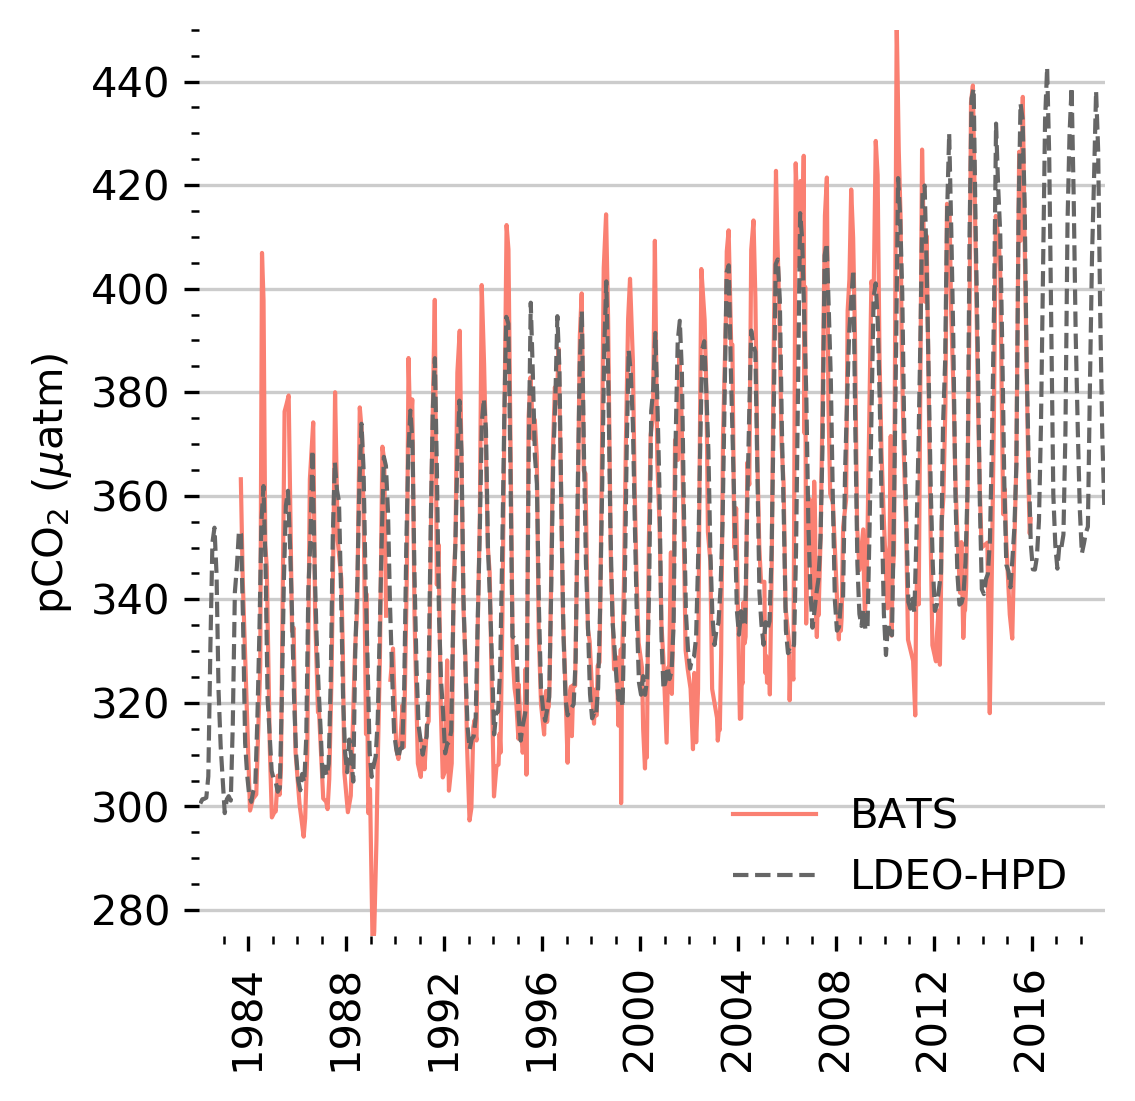

In [5]:
#with plt.rc_context({'axes.edgecolor':'orange'}):
fig = plt.figure(figsize=(4,4)) 
ax = fig.add_subplot(111)


# plot DATA
ax.plot(ds_bats['time'], ds_bats['spco2'], color='salmon', linewidth=1, label='BATS')

# plot HPD
ax.plot(ds_hpd['time'], 
        ds_hpd['spco2'].sel(lat=BATS['lat'], lon=BATS['lon'], method='nearest'),
        color=[0.4,0.4,0.4], linewidth=1, linestyle='--', label='LDEO-HPD')

# Range ov axes
ax.set_ylim([275, 450])
ax.set_xlim([np.datetime64('1982-01-01'), np.datetime64('2018-12-31')])

# Turn off the display of all ticks.
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
## Remove x tick marks
plt.setp(ax.get_xticklabels(), rotation=90)
### Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### major / minor tick lines
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

### Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

### Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

## Labels
ax.set_ylabel(f'pCO$_2$ ($\mu$atm)')

ax.legend(loc='lower right', frameon=False)

#plt.savefig(f'{dir_figs}/comparison_time_series_BATS.pdf', 
#                transparent = True, 
#                bbox_inches = 'tight', 
#                pad_inches = 0)

# Plot HOT data

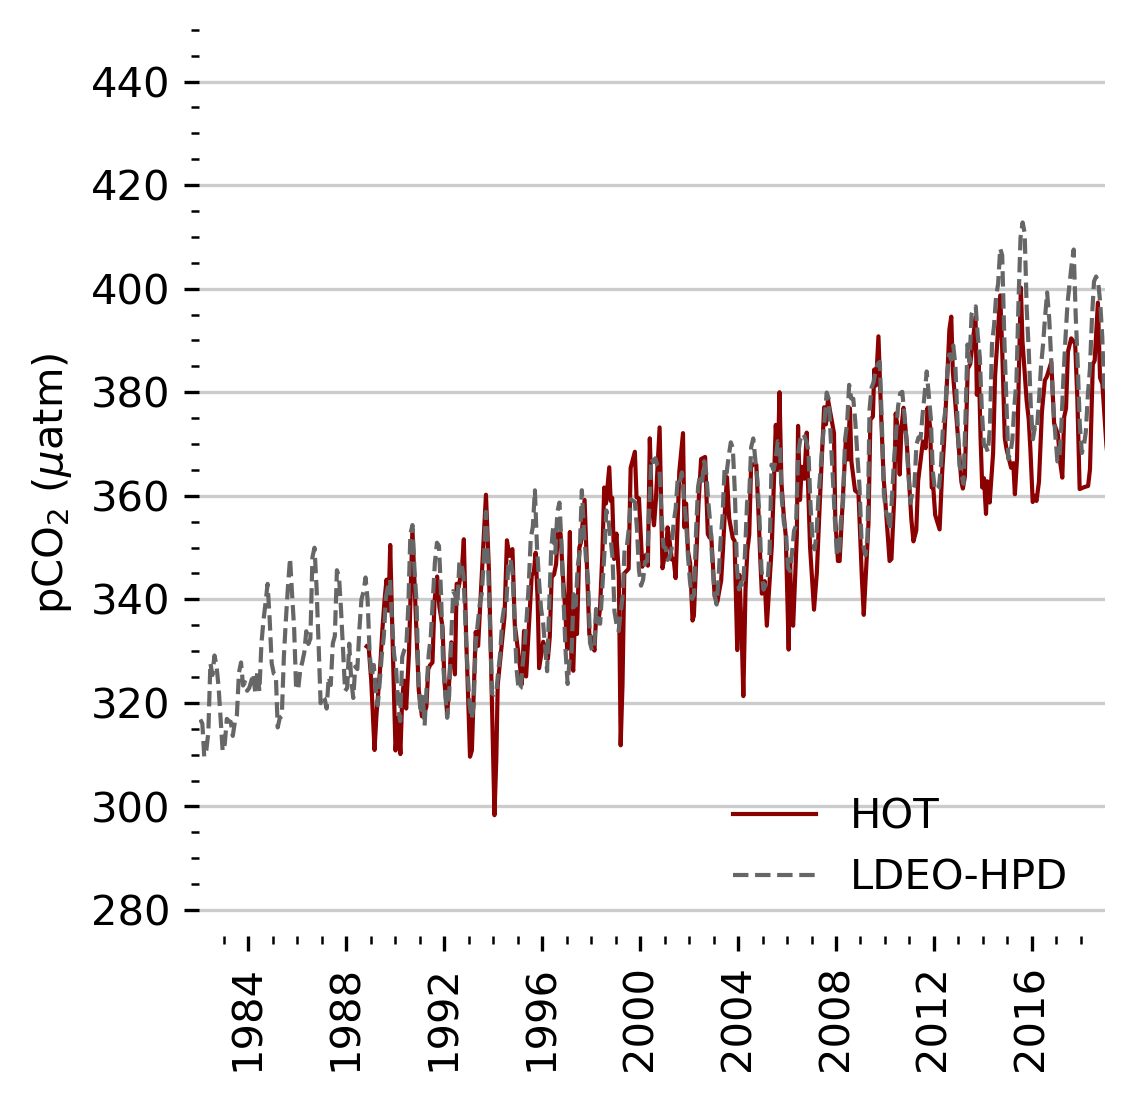

In [6]:
#with plt.rc_context({'axes.edgecolor':'orange'}):
fig = plt.figure(figsize=(4,4)) 
ax = fig.add_subplot(111)

# plot data
ax.plot(df_hot['time'], df_hot['spco2'], color='darkred',linewidth=1, label='HOT')

# plot GCB
ax.plot(ds_hpd['time'], 
        ds_hpd['spco2'].sel(lat=HOT['lat'], lon=HOT['lon'], method='nearest'),
        color=[0.4,0.4,0.4],linewidth=1, linestyle='--', label='LDEO-HPD')

# Range ov axes
ax.set_ylim([275, 450])
ax.set_xlim([np.datetime64('1982-01-01'), np.datetime64('2018-12-31')])


# Turn off the display of all ticks.
ax.tick_params(which='both', # Options for both major and minor ticks
                top='off', # turn off top ticks
                left='off', # turn off left ticks
                right='off',  # turn off right ticks
                bottom='off') # turn off bottom ticks
## Remove x tick marks
plt.setp(ax.get_xticklabels(), rotation=90)
### Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)

### major / minor tick lines
#ax.minorticks_on()
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.grid(axis='y', which='major', color=[0.8,0.8,0.8], linestyle='-')

### Only show ticks on the left and bottom spines
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

### Make axis square
x0, x1 = ax.get_xlim()
y0, y1 = ax.get_ylim()
ax.set_aspect(abs(x1-x0)/abs(y1-y0))

# Don't allow the axis to be on top of your data
ax.set_axisbelow(True)

## Labels
ax.set_ylabel(f'pCO$_2$ ($\mu$atm)')

ax.legend(loc='lower right', frameon=False)
#ax.plot(pd.to_datetime(df_hot['date']), df_hot['pCO2calc_insitu'],'r--')

#plt.savefig(f'{dir_figs}/comparison_time_series_HOT.pdf', 
#                transparent = True, 
#                bbox_inches = 'tight', 
#                pad_inches = 0)

# OLD

In [ ]:
#-----------------------------------------------------------------------------------------
# load pco2 data
#-----------------------------------------------------------------------------------------
data_dir = '/home/gloege/projects/ldeo_hpd/data/model_output/XGB'
ds_spco2 = xr.merge([xr.open_dataset(fl) for fl in glob.glob(f'{data_dir}/XGB*.nc')])
#ds_spco2 = ds_spco2.sel(time=slice("1985","2018"))

# GCB 2020
variables = [ 'corrected_cesm_spco2_1x1_A', 
    'corrected_csiro_spco2_1x1_A',
    'corrected_fesom_spco2_1x1_A',
    'corrected_mpi_spco2_1x1_A', 
    'corrected_cnrm_spco2_1x1_A',
    'corrected_ipsl_spco2_1x1_A',
    'corrected_planktom_spco2_1x1_A',
    'corrected_noresm_spco2_1x1_A',
    'corrected_princeton_spco2_1x1_A',]
# make dummy variable of zeros
ds_spco2['spco2'] = ds_spco2['corrected_cesm_spco2_1x1_A']*0
# add all predictions together
for var in variables:
    ds_spco2['spco2'] += ds_spco2[f'{var}']
# divide by number vars to average
ds_spco2['spco2'] = ds_spco2['spco2'] / len(variables)

In [ ]:
#ds_out = xr.open_dataset('/local/data/artemis/workspace/gloege/for_amanda/LDEO_HPD_product/LDEO-HPD_mon_1x1_198201-201612.nc')
dir_reccap='/local/data/artemis/workspace/gloege/RECCAP2'
ds_hpd = xr.open_dataset(f'{dir_reccap}/LDEO-HPD-average_v20210413_1x1_198201-201812.nc')
#flux_den_hpd_yr = ds_hpd['fgco2_glob'].groupby('time.year').mean('time')

In [ ]:
# locations
BATS={'lat':31.83,
      'lon':360-(64.17)}

HOT={'lat':22.75,
      'lon':360-158}

# load data
dir_data = '/local/data/artemis/workspace/gloege'
# BATS
ds_bats = xr.open_dataset(f'{dir_data}/data/BATS/BATS.nc')

# HOT
ds_hot = xr.open_dataset(f'{dir_data}/data/HOT/HOT.nc')
ds_hot = ds_hot.where(ds_hot['spco2']>0)